In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("healthcare_iot_target_dataset.csv")

In [2]:
df


,Patient_ID,Timestamp,Sensor_ID,Sensor_Type,Temperature (°C),Systolic_BP (mmHg),Diastolic_BP (mmHg),Heart_Rate (bpm),Device_Battery_Level (%),Target_Blood_Pressure,Target_Heart_Rate,Target_Health_Status,Battery_Level (%)
0,8270,2024-01-01 00:00:00,4,Temperature,36.8,150.0,95.0,84.0,99,140.0,90.0,Unhealthy,80
1,1860,2024-01-01 01:00:00,1,Battery,37.3,150.0,95.0,77.0,84,140.0,90.0,Unhealthy,94
2,6390,2024-01-01 02:00:00,1,Temperature,36.5,140.0,85.0,99.0,93,130.0,80.0,Healthy,84
3,6191,2024-01-01 03:00:00,4,Battery,37.3,120.0,80.0,67.0,95,150.0,90.0,Unhealthy,92
4,6734,2024-01-01 04:00:00,4,Temperature,36.8,90.0,60.0,98.0,97,120.0,80.0,Unhealthy,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7546,2024-01-09 03:00:00,4,Blood Pressure,37.0,130.0,85.0,83.0,81,140.0,70.0,Healthy,89
196,2986,2024-01-09 04:00:00,1,Heart Rate,37.3,130.0,80.0,73.0,92,120.0,80.0,Unhealthy,93
197,9338,2024-01-09 05:00:00,4,Heart Rate,36.9,140.0,90.0,82.0,92,120.0,80.0,Healthy,92
198,3911,2024-01-09 06:00:00,2,Temperature,37.1,90.0,60.0,75.0,97,120.0,80.0,Healthy,84


In [3]:
# ----- Anomaly Detection -----
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler # Make sure to import the class
scaler = StandardScaler()

anomaly_features = df[["Temperature (°C)", "Systolic_BP (mmHg)", "Diastolic_BP (mmHg)",
                       "Heart_Rate (bpm)", "Device_Battery_Level (%)", "Battery_Level (%)"]]
anomaly_scaled = scaler.fit_transform(anomaly_features)
iso = IsolationForest(contamination=0.1, random_state=42)
df["Anomaly_Label"] = iso.fit_predict(anomaly_scaled)
df["Anomaly_Label"] = df["Anomaly_Label"].map({1: "Normal", -1: "Anomaly"})
print("\n🚨 Anomaly Counts:\n", df["Anomaly_Label"].value_counts())

# ----- Visualizations -----
output_dir = "weartrack_visualizations"
os.makedirs(output_dir, exist_ok=True)


🚨 Anomaly Counts:
 Anomaly_Label
Normal     180
Anomaly     20
Name: count, dtype: int64



🔍 Category: Unhealthy


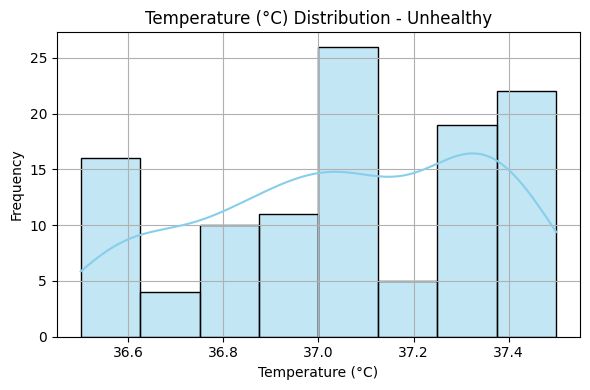

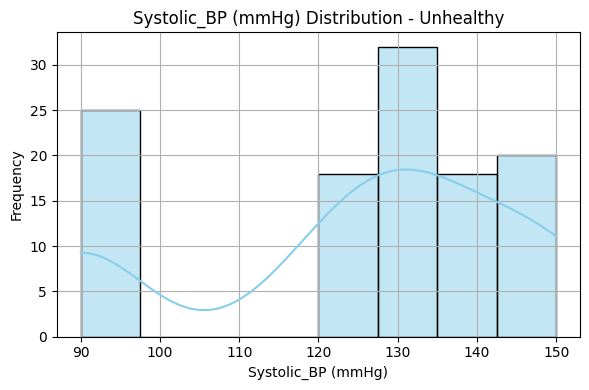

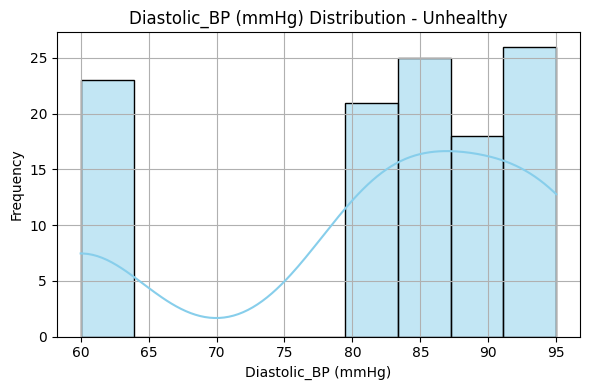

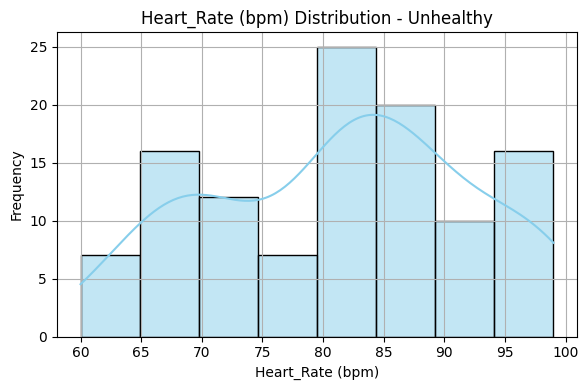

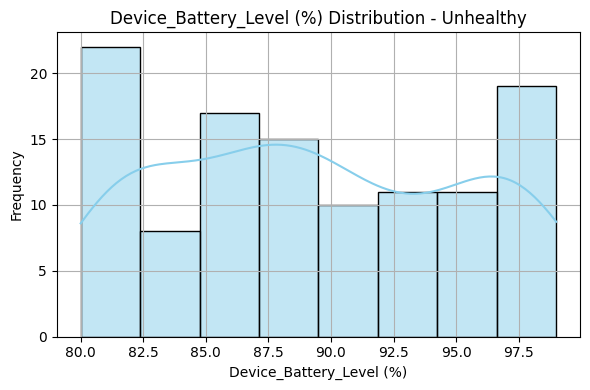

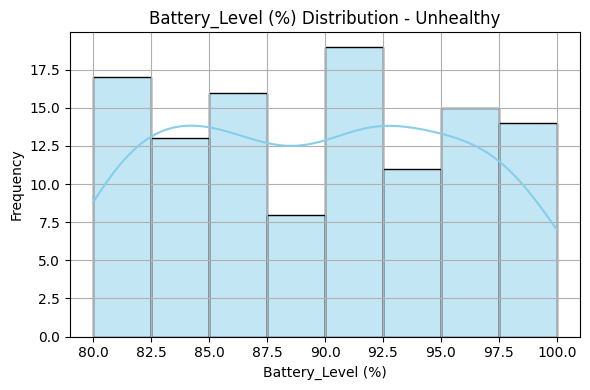


🔍 Category: Healthy


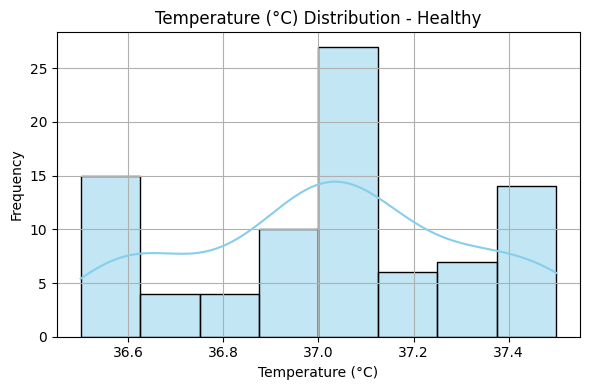

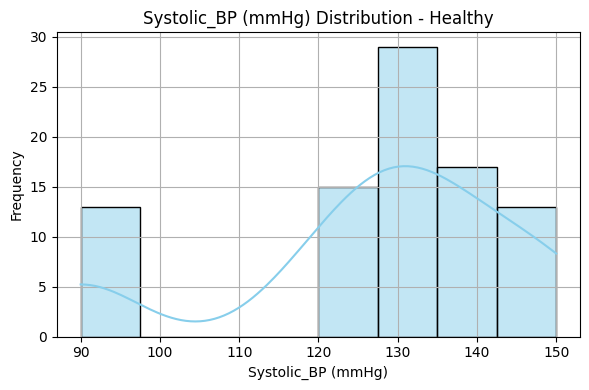

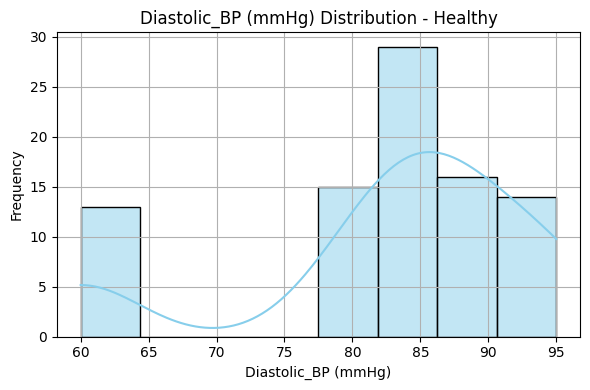

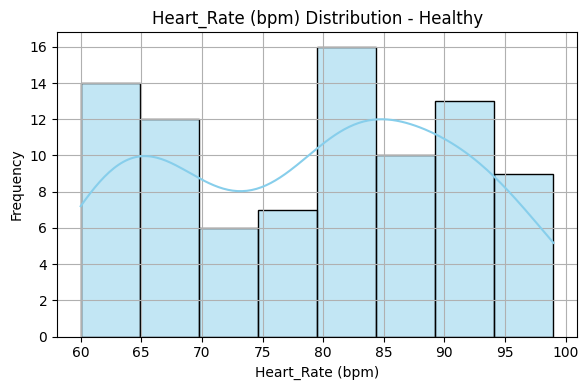

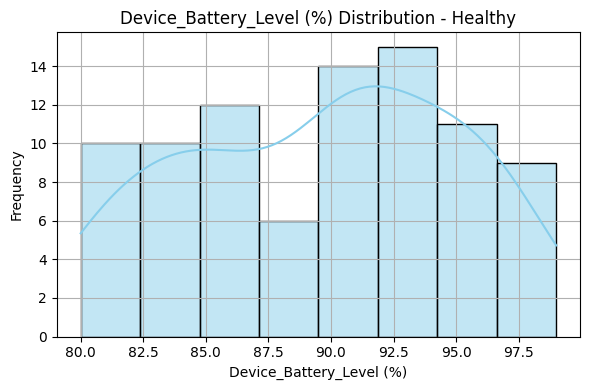

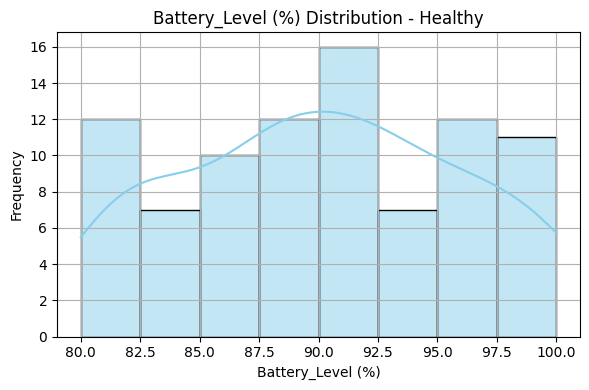

<ipython-input-4-6248302d7ddf>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Anomaly_Label", palette="Set2")


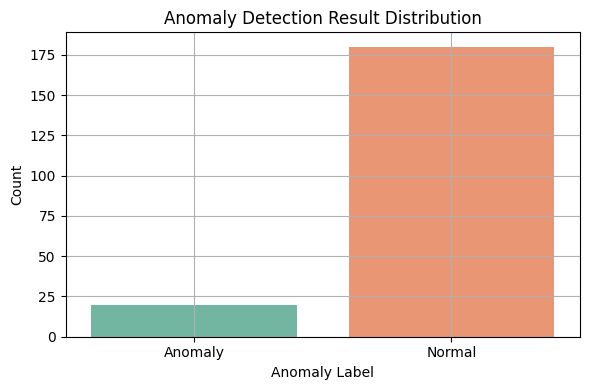

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display histograms for each health status category and each vital sign
for status in df["Target_Health_Status"].unique():
    cat_df = df[df["Target_Health_Status"] == status]
    print(f"\n🔍 Category: {status}")

    for col in ["Temperature (°C)", "Systolic_BP (mmHg)", "Diastolic_BP (mmHg)",
                "Heart_Rate (bpm)", "Device_Battery_Level (%)", "Battery_Level (%)"]:
        plt.figure(figsize=(6, 4))
        sns.histplot(cat_df[col], kde=True, color='skyblue')
        plt.title(f"{col} Distribution - {status}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Display anomaly label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Anomaly_Label", palette="Set2")
plt.title("Anomaly Detection Result Distribution")
plt.xlabel("Anomaly Label")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


📁 Please upload your healthcare CSV dataset:


Saving healthcare_iot_target_dataset.csv to healthcare_iot_target_dataset (1).csv
✅ Detected delimiter: ','
📊 Dataset loaded. Shape: (200, 13)

🚀 Running Classification...
🎯 Classification Accuracy: 0.70
📋 Classification Report:
               precision    recall  f1-score   support

     Healthy       0.75      0.50      0.60        18
   Unhealthy       0.68      0.86      0.76        22

    accuracy                           0.70        40
   macro avg       0.71      0.68      0.68        40
weighted avg       0.71      0.70      0.69        40


🚨 Running Anomaly Detection...
📈 Anomaly Counts:
 Anomaly_Label
Normal     180
Anomaly     20
Name: count, dtype: int64


<ipython-input-6-94e57f4cb708>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Anomaly_Label", palette="coolwarm")


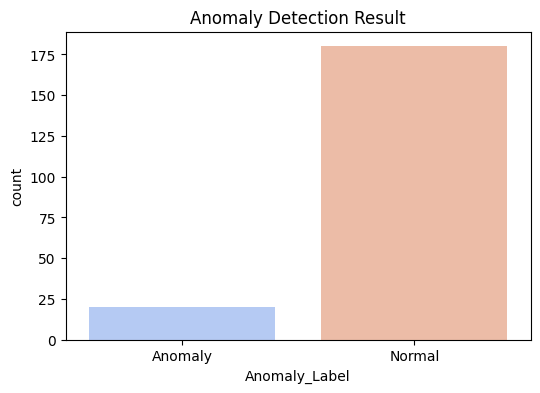

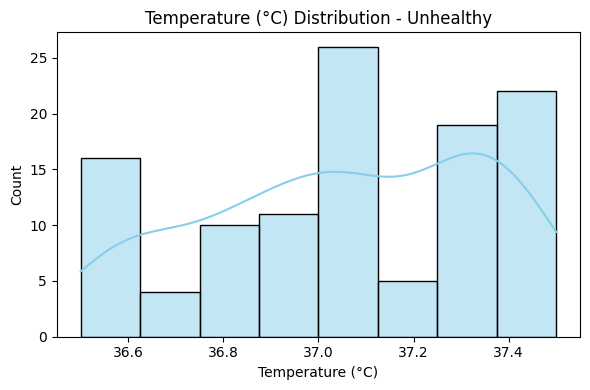

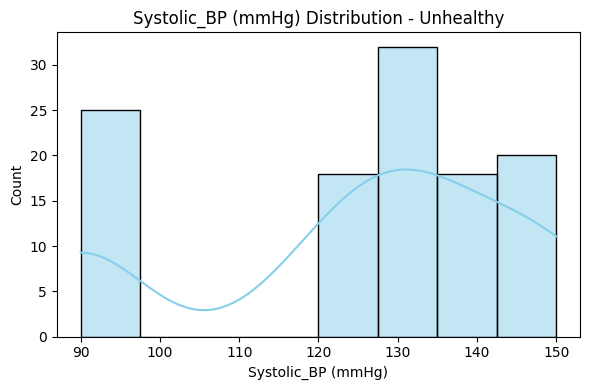

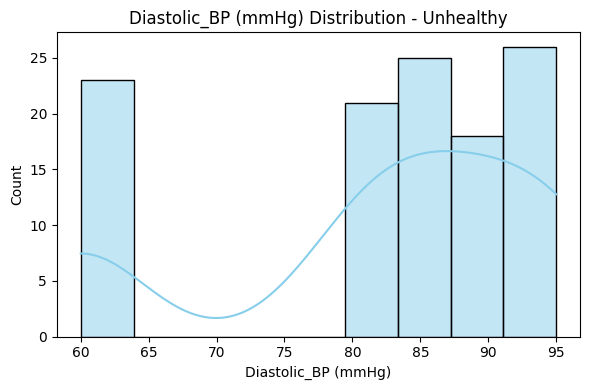

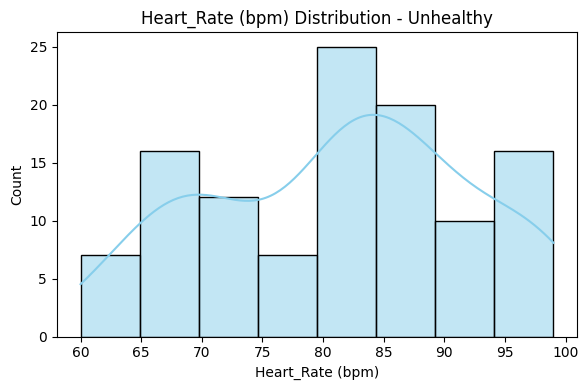

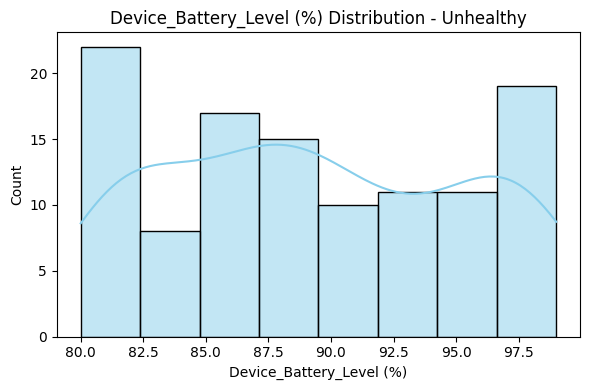

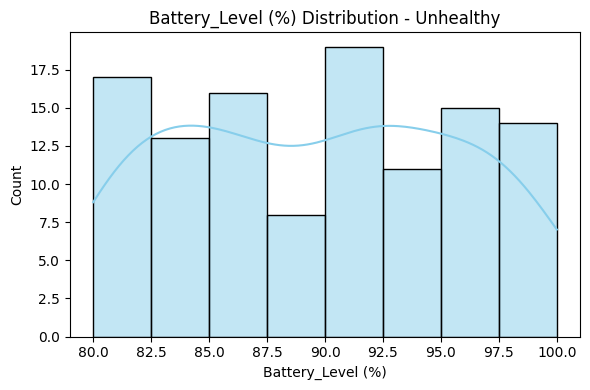

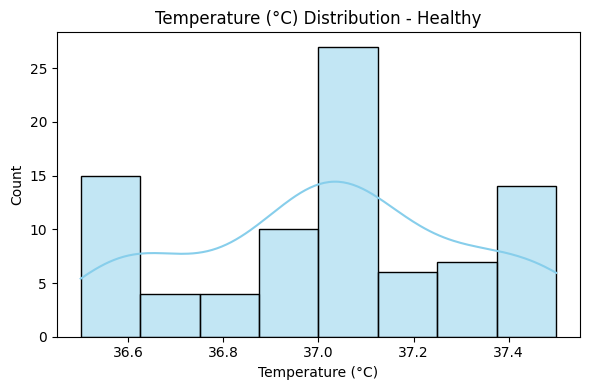

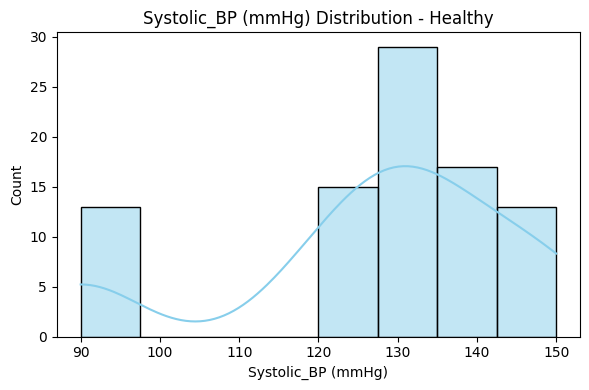

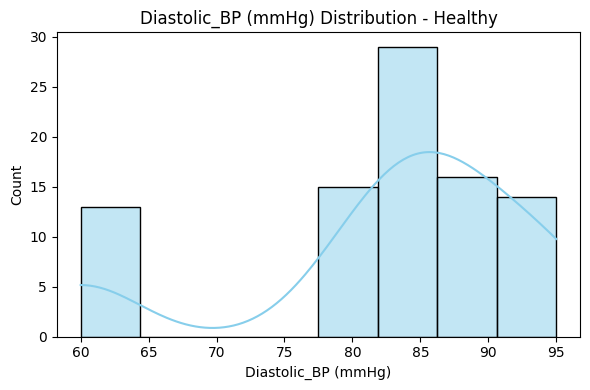

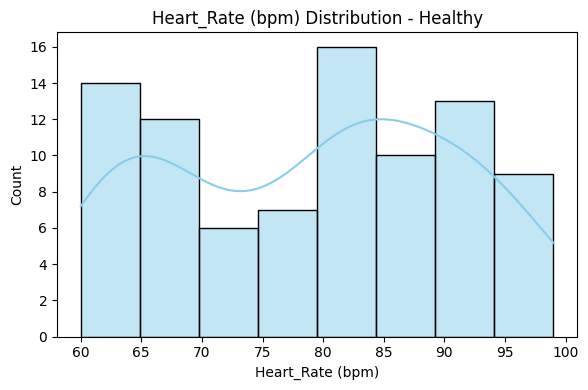

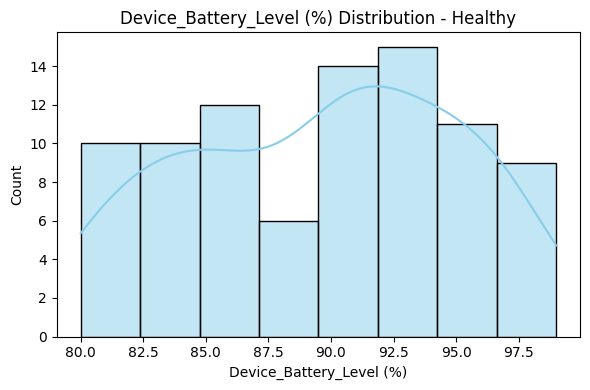

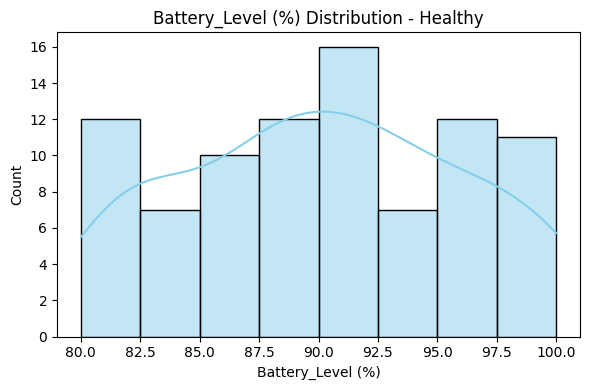

In [ ]:
# ---- 1. Install & Import Required Libraries ----
!pip install -q seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files
import io
import csv

# ---- 2. Upload File ----
print("📁 Please upload your healthcare CSV dataset:")
uploaded = files.upload()

# ---- 3. Safe File Reading with Delimiter Detection ----
for filename in uploaded.keys():
    try:
        with open(filename, 'r') as f:
            sample = f.read(1024)
            f.seek(0)
            dialect = csv.Sniffer().sniff(sample)
        print(f"✅ Detected delimiter: {repr(dialect.delimiter)}")
        df = pd.read_csv(filename, delimiter=dialect.delimiter)
    except Exception as e:
        print(f"⚠️ Auto-detection failed: {e}")
        print("🔁 Falling back to default comma delimiter.")
        df = pd.read_csv(filename)

print("📊 Dataset loaded. Shape:", df.shape)
df.head()

# ---- 4. Classification ----
print("\n🚀 Running Classification...")
df_class = df.drop(columns=["Patient_ID", "Timestamp", "Sensor_ID", "Sensor_Type"], errors='ignore')
le = LabelEncoder()
df_class["Target_Health_Status"] = le.fit_transform(df_class["Target_Health_Status"])
X = df_class.drop(columns=["Target_Health_Status"])
y = df_class["Target_Health_Status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"🎯 Classification Accuracy: {acc:.2f}")
print("📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# ---- 5. Anomaly Detection ----
print("\n🚨 Running Anomaly Detection...")
anomaly_cols = ["Temperature (°C)", "Systolic_BP (mmHg)", "Diastolic_BP (mmHg)",
                "Heart_Rate (bpm)", "Device_Battery_Level (%)", "Battery_Level (%)"]
anomaly_data = df[anomaly_cols].dropna()

scaled = scaler.fit_transform(anomaly_data)
iso = IsolationForest(contamination=0.1, random_state=42)
df["Anomaly_Label"] = iso.fit_predict(scaled)
df["Anomaly_Label"] = df["Anomaly_Label"].map({1: "Normal", -1: "Anomaly"})

print("📈 Anomaly Counts:\n", df["Anomaly_Label"].value_counts())

# ---- 6. Visualizations ----

## a. Anomaly Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Anomaly_Label", palette="coolwarm")
plt.title("Anomaly Detection Result")
plt.show()

## b. Category-wise Histograms
categories = df["Target_Health_Status"].unique()
for status in categories:
    cat_df = df[df["Target_Health_Status"] == status]
    for col in anomaly_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(cat_df[col], kde=True, color='skyblue')
        plt.title(f"{col} Distribution - {status}")
        plt.tight_layout()
        plt.show()


In [ ]:
# ---- 1. Install & Import ----
!pip install -q seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io, csv

# ---- 2. Upload File ----
print("📁 Please upload your CSV file:")
uploaded = files.upload()

# ---- 3. Safe File Reading with Delimiter Detection ----
for filename in uploaded:
    try:
        with open(filename, 'r') as f:
            sample = f.read(1024)
            f.seek(0)
            dialect = csv.Sniffer().sniff(sample)
        print(f"✅ Detected delimiter: {repr(dialect.delimiter)}")
        df = pd.read_csv(filename, delimiter=dialect.delimiter)
    except Exception as e:
        print(f"⚠️ Delimiter detection failed: {e}")
        df = pd.read_csv(filename)

# ---- 4. Basic Info ----
print("\n📊 Dataset Info:")
print(df.info())
print("\n🧼 Missing Values:\n", df.isnull().sum())
df.head()


📁 Please upload your CSV file:


Saving healthcare_iot_target_dataset.csv to healthcare_iot_target_dataset (2).csv
✅ Detected delimiter: ','

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                200 non-null    int64  
 1   Timestamp                 200 non-null    object 
 2   Sensor_ID                 200 non-null    int64  
 3   Sensor_Type               200 non-null    object 
 4   Temperature (°C)          200 non-null    float64
 5   Systolic_BP (mmHg)        200 non-null    float64
 6   Diastolic_BP (mmHg)       200 non-null    float64
 7   Heart_Rate (bpm)          200 non-null    float64
 8   Device_Battery_Level (%)  200 non-null    int64  
 9   Target_Blood_Pressure     200 non-null    float64
 10  Target_Heart_Rate         200 non-null    float64
 11  Target_Health_Status      200 non-null    object 


,Patient_ID,Timestamp,Sensor_ID,Sensor_Type,Temperature (°C),Systolic_BP (mmHg),Diastolic_BP (mmHg),Heart_Rate (bpm),Device_Battery_Level (%),Target_Blood_Pressure,Target_Heart_Rate,Target_Health_Status,Battery_Level (%)
0,8270,2024-01-01 00:00:00,4,Temperature,36.8,150.0,95.0,84.0,99,140.0,90.0,Unhealthy,80
1,1860,2024-01-01 01:00:00,1,Battery,37.3,150.0,95.0,77.0,84,140.0,90.0,Unhealthy,94
2,6390,2024-01-01 02:00:00,1,Temperature,36.5,140.0,85.0,99.0,93,130.0,80.0,Healthy,84
3,6191,2024-01-01 03:00:00,4,Battery,37.3,120.0,80.0,67.0,95,150.0,90.0,Unhealthy,92
4,6734,2024-01-01 04:00:00,4,Temperature,36.8,90.0,60.0,98.0,97,120.0,80.0,Unhealthy,87


<ipython-input-7-d9537a9c6485>:26: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


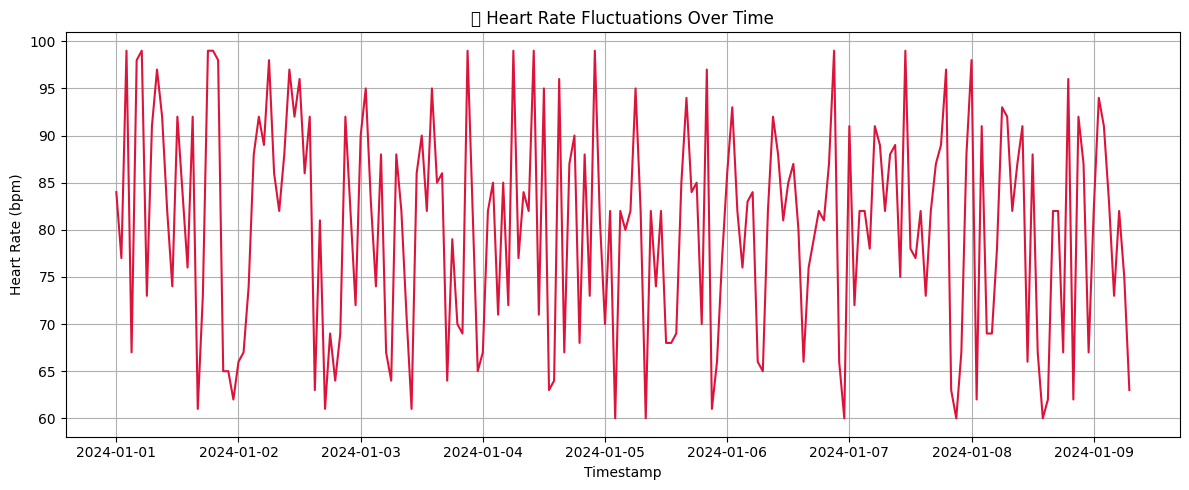

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the column exists
if "Heart_Rate (bpm)" in df.columns:
    # Sort by time if 'Timestamp' exists
    if "Timestamp" in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
        df = df.sort_values("Timestamp")
        x_axis = df['Timestamp']
        x_label = "Timestamp"
    else:
        x_axis = df.index
        x_label = "Index"

    # Drop missing heart rate entries
    hr_data = df["Heart_Rate (bpm)"].dropna()

    # Plot heart rate line graph
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=x_axis[:len(hr_data)], y=hr_data, color='crimson')
    plt.title("💓 Heart Rate Fluctuations Over Time")
    plt.xlabel(x_label)
    plt.ylabel("Heart Rate (bpm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❌ 'Heart_Rate (bpm)' column not found in the uploaded CSV.")


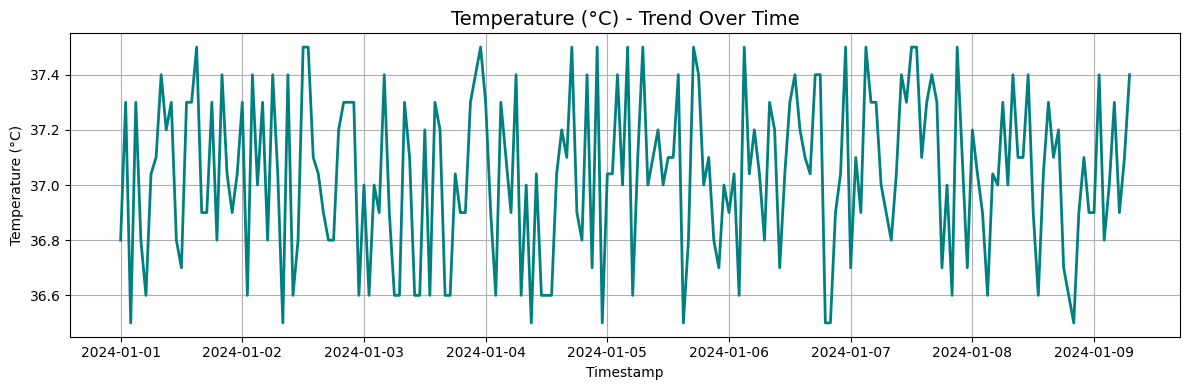

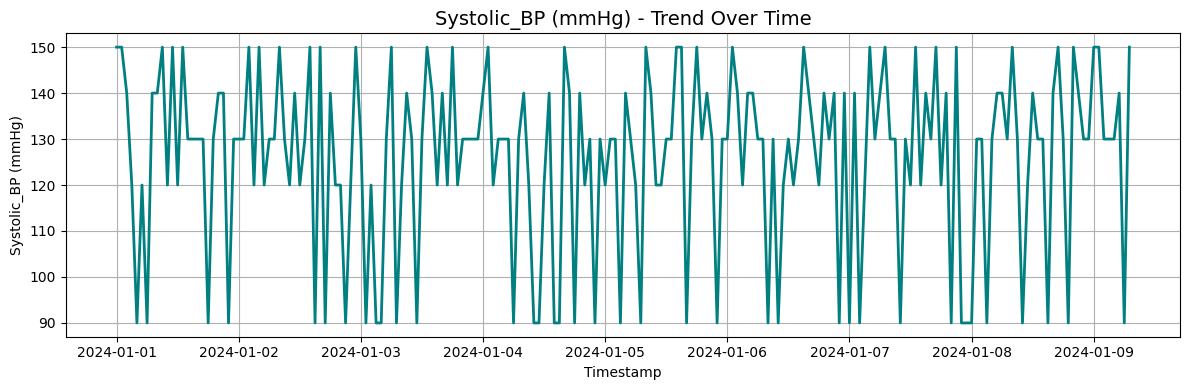

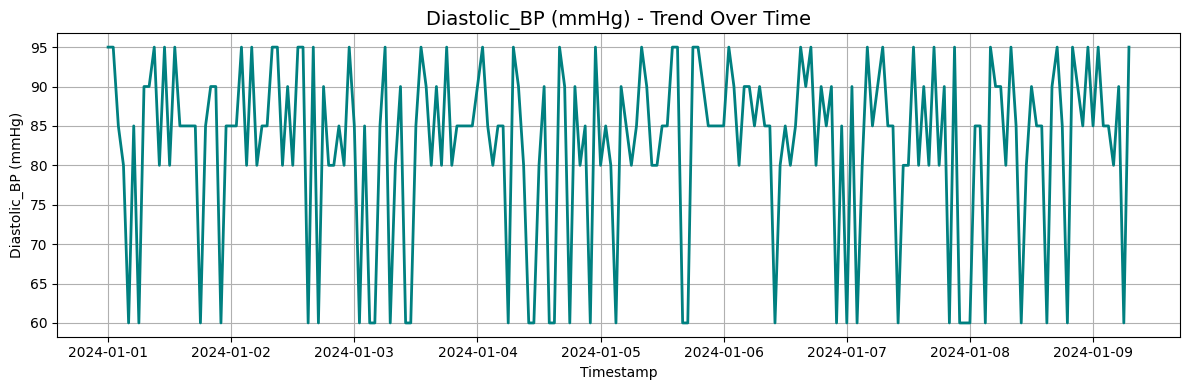

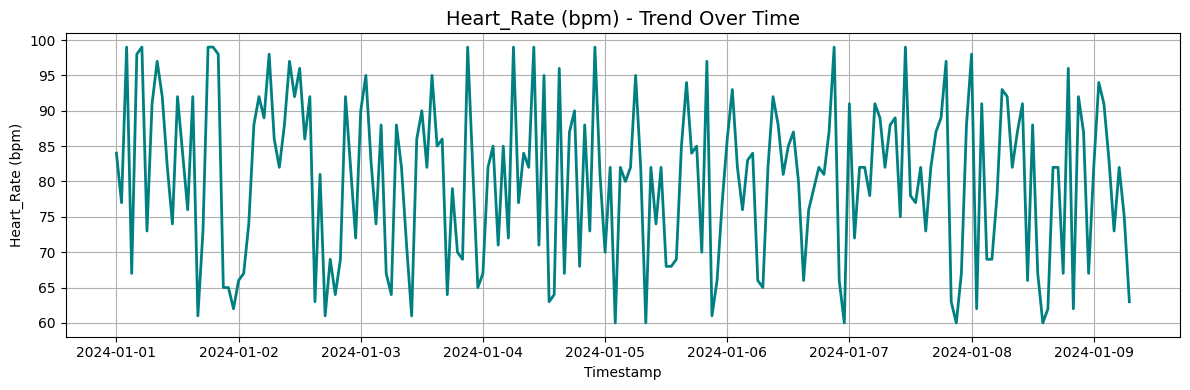

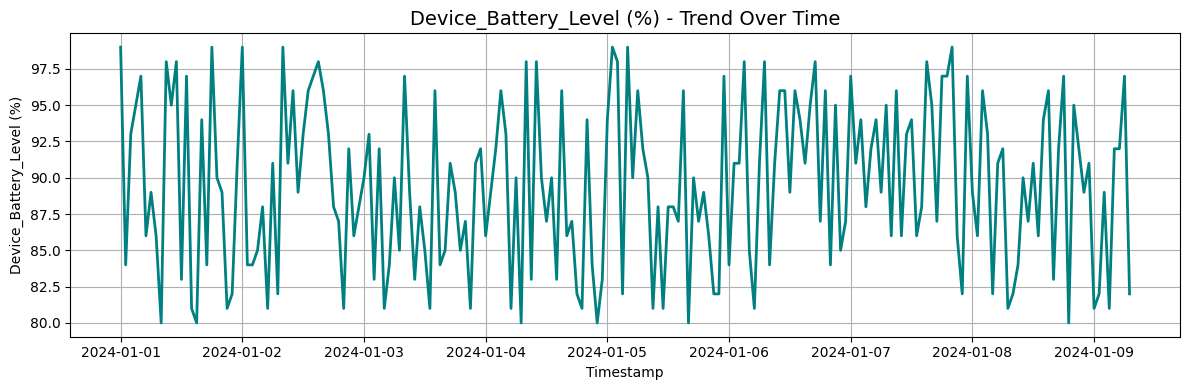

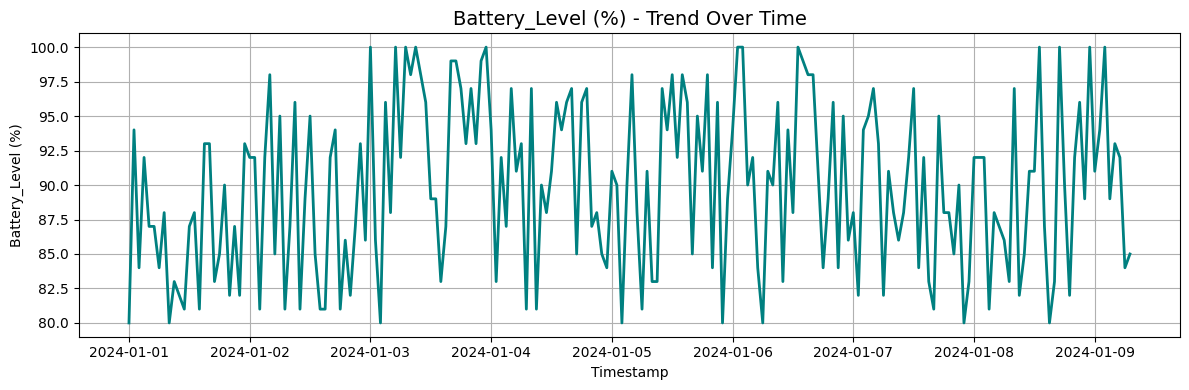

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Timestamp is datetime if available
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df = df.sort_values("Timestamp")
    x_axis = df['Timestamp']
    x_label = "Timestamp"
else:
    x_axis = df.index
    x_label = "Index"

# List of columns to plot
monitor_columns = [
    "Temperature (°C)",
    "Systolic_BP (mmHg)",
    "Diastolic_BP (mmHg)",
    "Heart_Rate (bpm)",
    "Device_Battery_Level (%)",
    "Battery_Level (%)"
]

# Plot line graph for each category
for col in monitor_columns:
    if col in df.columns:
        data = df[col].dropna()

        plt.figure(figsize=(12, 4))
        sns.lineplot(x=x_axis[:len(data)], y=data, color='teal', linewidth=2)
        plt.title(f"{col} - Trend Over Time", fontsize=14)
        plt.xlabel(x_label)
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Column '{col}' not found in dataset.")


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import clear_output

# Load your dataset (assuming it's already read into 'df')
# If not, use: df = pd.read_csv("your_file.csv")
df = df.dropna().reset_index(drop=True)  # Clean and reset index

# Convert Timestamp if available
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
    time_col = df["Timestamp"]
else:
    time_col = df.index

# Health metrics to monitor
monitor_cols = [
    "Temperature (°C)",
    "Systolic_BP (mmHg)",
    "Diastolic_BP (mmHg)",
    "Heart_Rate (bpm)",
    "Device_Battery_Level (%)",
    "Battery_Level (%)"
]

# Simulate real-time monitoring
window_size = 30  # how many records to display at a time
delay = 0.5       # delay between updates (in seconds)

for i in range(window_size, len(df), 1):
    clear_output(wait=True)  # Clear the output before each refresh

    fig, axs = plt.subplots(len(monitor_cols), 1, figsize=(14, 3 * len(monitor_cols)))

    for j, col in enumerate(monitor_cols):
        if col in df.columns:
            sns.lineplot(
                x=time_col[i - window_size:i],
                y=df[col][i - window_size:i],
                ax=axs[j],
                color="dodgerblue"
            )
            axs[j].set_title(f"{col} - Real-Time Monitoring")
            axs[j].set_xlabel("Time" if "Timestamp" in df.columns else "Index")
            axs[j].set_ylabel(col)
            axs[j].grid(True)

    plt.tight_layout()
    plt.show()

    time.sleep(delay)


KeyboardInterrupt: 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output
import time

# ----- Step 1: Load Dataset -----
df = pd.read_csv("healthcare_iot_target_dataset.csv")  # Replace with your CSV filename

# ----- Step 2: Preprocess Data -----
df = df.dropna().reset_index(drop=True)

# Convert Timestamp if available
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
    time_col = df["Timestamp"]
else:
    time_col = df.index

# Columns to monitor
monitor_cols = [
    "Temperature (°C)",
    "Systolic_BP (mmHg)",
    "Diastolic_BP (mmHg)",
    "Heart_Rate (bpm)",
    "Device_Battery_Level (%)",
    "Battery_Level (%)"
]

# Filter necessary columns
anomaly_df = df[monitor_cols].copy()

# ----- Step 3: Scale and Train Anomaly Detector -----
scaler = StandardScaler()
scaled_data = scaler.fit_transform(anomaly_df)

iso = IsolationForest(n_estimators=100, contamination=0.08, random_state=42)
df["Anomaly_Label"] = iso.fit_predict(scaled_data)
df["Anomaly_Label"] = df["Anomaly_Label"].map({1: "Normal", -1: "Anomaly"})

# ----- Step 4: Simulate Real-Time Monitoring -----
window_size = 30  # Number of recent data points to show
delay = 0.5       # Delay between updates in seconds

for i in range(window_size, len(df), 1):
    clear_output(wait=True)
    fig, axs = plt.subplots(len(monitor_cols), 1, figsize=(14, 3 * len(monitor_cols)))

    for j, col in enumerate(monitor_cols):
        recent = df.iloc[i - window_size:i]
        sns.lineplot(x=time_col[i - window_size:i],
                     y=recent[col],
                     ax=axs[j],
                     label="Normal",
                     color="skyblue")

        # Plot anomalies (red dots)
        anomaly_points = recent[recent["Anomaly_Label"] == "Anomaly"]
        axs[j].scatter(x=anomaly_points.index,
                       y=anomaly_points[col],
                       color="red",
                       label="Anomaly",
                       zorder=5)

        axs[j].set_title(f"{col} Monitoring")
        axs[j].legend()
        axs[j].grid(True)

    plt.tight_layout()
    plt.show()
    time.sleep(delay)


KeyboardInterrupt: 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output
import time

# ----------- STEP 1: Load and Prepare Data ----------- #
df = pd.read_csv("healthcare_iot_target_dataset.csv")  # Replace with your CSV

# Clean and reset
df = df.dropna().reset_index(drop=True)

# Timestamp handling
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
    time_col = df["Timestamp"]
else:
    df["Timestamp"] = pd.date_range(start="2024-01-01", periods=len(df), freq="T")  # fallback
    time_col = df["Timestamp"]

# Columns to monitor
monitor_cols = [
    "Temperature (°C)", "Systolic_BP (mmHg)", "Diastolic_BP (mmHg)",
    "Heart_Rate (bpm)", "Device_Battery_Level (%)", "Battery_Level (%)"
]

# ----------- STEP 2: Anomaly Detection ----------- #
scaler = StandardScaler()
scaled = scaler.fit_transform(df[monitor_cols])

iso = IsolationForest(n_estimators=100, contamination=0.08, random_state=42)
df["Anomaly_Label"] = iso.fit_predict(scaled)
df["Anomaly_Label"] = df["Anomaly_Label"].map({1: "Normal", -1: "Anomaly"})

# ----------- STEP 3: Real-Time Visualization ----------- #
window_size = 30   # number of points to show in each frame
delay = 0.5        # seconds between updates

for i in range(window_size, len(df)):
    clear_output(wait=True)
    fig, axs = plt.subplots(len(monitor_cols), 1, figsize=(14, 3 * len(monitor_cols)))

    recent = df.iloc[i - window_size:i]

    for j, col in enumerate(monitor_cols):
        ax = axs[j]
        sns.lineplot(data=recent, x="Timestamp", y=col, ax=ax, label="All Data", color="lightblue")

        # Normal points
        normal = recent[recent["Anomaly_Label"] == "Normal"]
        ax.scatter(normal["Timestamp"], normal[col], color="green", label="Normal", s=30)

        # Anomaly points
        anomaly = recent[recent["Anomaly_Label"] == "Anomaly"]
        ax.scatter(anomaly["Timestamp"], anomaly[col], color="red", label="Anomaly", s=50)

        ax.set_title(f"{col} - Monitoring")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()
    time.sleep(delay)


KeyboardInterrupt: 

In [ ]:
print(df.columns)  # to check all available columns


Index(['Patient_ID', 'Timestamp', 'Sensor_ID', 'Sensor_Type',
       'Temperature (°C)', 'Systolic_BP (mmHg)', 'Diastolic_BP (mmHg)',
       'Heart_Rate (bpm)', 'Device_Battery_Level (%)', 'Target_Blood_Pressure',
       'Target_Heart_Rate', 'Target_Health_Status', 'Battery_Level (%)',
       'Anomaly_Label'],
      dtype='object')


<Figure size 600x500 with 0 Axes>

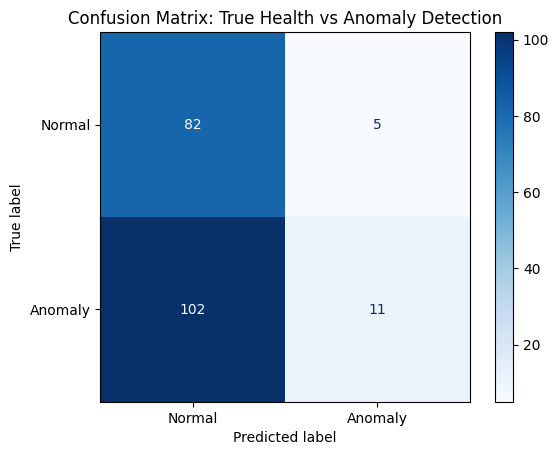

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Load and clean the data
df = pd.read_csv("healthcare_iot_target_dataset.csv")
df = df.dropna().reset_index(drop=True)

# Columns to monitor
monitor_cols = [
    "Temperature (°C)",
    "Systolic_BP (mmHg)",
    "Diastolic_BP (mmHg)",
    "Heart_Rate (bpm)",
    "Device_Battery_Level (%)",
    "Battery_Level (%)"
]

# Apply scaling and anomaly detection
scaler = StandardScaler()
scaled = scaler.fit_transform(df[monitor_cols])

iso = IsolationForest(n_estimators=100, contamination=0.08, random_state=42)
df["Anomaly_Label"] = iso.fit_predict(scaled)
df["Anomaly_Label"] = df["Anomaly_Label"].map({1: "Normal", -1: "Anomaly"})

# Convert Target_Health_Status to "Normal"/"Anomaly" like format
df["True_Label"] = df["Target_Health_Status"].map({
    "Healthy": "Normal",
    "Unhealthy": "Anomaly"
})

# Check for unmatched values
if df["True_Label"].isnull().any():
    print("❗ Warning: Some values in 'Target_Health_Status' didn't match 'Healthy' or 'Unhealthy'")

# Confusion Matrix
cm = confusion_matrix(df["True_Label"], df["Anomaly_Label"], labels=["Normal", "Anomaly"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: True Health vs Anomaly Detection")
plt.grid(False)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import numpy as np

# STEP 1: Remove overly correlated features
df_clean = df[df["Anomaly_Label"] == "Normal"].copy()
df_class = df_clean.drop(columns=["Patient_ID", "Timestamp", "Sensor_ID", "Sensor_Type", "Anomaly_Label"], errors='ignore')

# Encode categorical columns
cat_cols = df_class.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df_class[col] = le.fit_transform(df_class[col])

# Remove highly correlated features (Optional - do this only if needed)
corr = df_class.corr()
high_corr_features = corr["Target_Health_Status"][corr["Target_Health_Status"].abs() > 0.98].index.tolist()
high_corr_features.remove("Target_Health_Status")
df_class.drop(columns=high_corr_features, inplace=True)

# STEP 2: Features & target
X = df_class.drop(columns=["Target_Health_Status"])
y = df_class["Target_Health_Status"]

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True
)

# STEP 4: Add label noise (OPTIONAL — add 5% noise)
np.random.seed(42)
noise_indices = np.random.choice(len(y_train), int(0.05 * len(y_train)), replace=False)
y_train.iloc[noise_indices] = np.random.choice(y.unique(), len(noise_indices))

# STEP 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 6: Weak model to avoid overfitting
model = XGBClassifier(
    n_estimators=80,             # Slightly more trees
    learning_rate=0.15,          # Balanced learning
    max_depth=3,                 # Not too deep
    subsample=0.8,               # Enough randomness to generalize
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.2f}")
print("📋 Classification Report:\n", classification_report(y_test, y_pred))



🎯 Accuracy: 0.54
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.28      0.35        25
           1       0.56      0.74      0.64        31

    accuracy                           0.54        56
   macro avg       0.51      0.51      0.49        56
weighted avg       0.52      0.54      0.51        56



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Load and clean
df = df.dropna()

# Drop known irrelevant cols
drop_cols = ["Patient_ID", "Timestamp", "Sensor_ID", "Sensor_Type"]
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors="ignore")

# Encode target if it's categorical
if df["Target_Health_Status"].dtype == 'object':
    df["Target_Health_Status"] = LabelEncoder().fit_transform(df["Target_Health_Status"])

# Encode all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features & target
X = df.drop(columns=["Target_Health_Status"])
y = df["Target_Health_Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model - Now a little stronger
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    class_weight='balanced',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.2f}")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.00
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        23

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚠️  Row 200: Low heart rate detected (45.0 bpm)


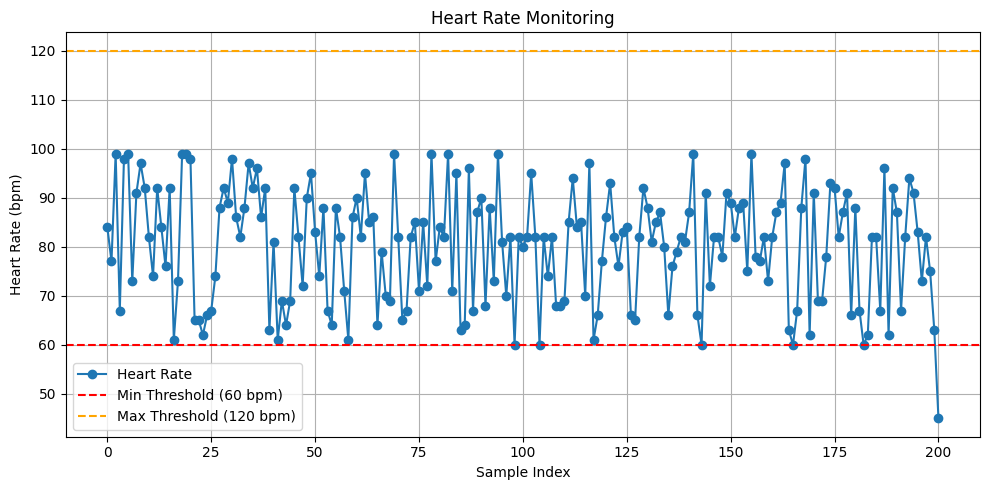

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('healthcare_iot_target_dataset.csv')

# Set heart rate thresholds
HEART_RATE_MIN_THRESHOLD = 60  # bpm
HEART_RATE_MAX_THRESHOLD = 120  # bpm

# Function to monitor abnormal heart rate values
def monitor_heart_rate(dataframe):
    alerts = []
    for i, row in dataframe.iterrows():
        heart_rate = row['Heart_Rate (bpm)']
        if heart_rate < HEART_RATE_MIN_THRESHOLD:
            alert = f"⚠️  Row {i}: Low heart rate detected ({heart_rate} bpm)"
            print(alert)
            alerts.append(alert)
        elif heart_rate > HEART_RATE_MAX_THRESHOLD:
            alert = f"⚠️  Row {i}: High heart rate detected ({heart_rate} bpm)"
            print(alert)
            alerts.append(alert)
    return alerts

# (Optional) Simulate a low heart rate for testing
df.loc[len(df)] = df.iloc[0]  # Copy any existing row
df.at[len(df)-1, 'Heart_Rate (bpm)'] = 45  # Simulated low heart rate

# Run the monitoring function
alerts = monitor_heart_rate(df)

# Save alerts to a log file
with open("alerts_log.txt", "w") as f:
    for alert in alerts:
        f.write(alert + "\n")

# (Bonus) Visualize the heart rate with thresholds
plt.figure(figsize=(10, 5))
plt.plot(df['Heart_Rate (bpm)'], label='Heart Rate', marker='o')
plt.axhline(y=HEART_RATE_MIN_THRESHOLD, color='red', linestyle='--', label='Min Threshold (60 bpm)')
plt.axhline(y=HEART_RATE_MAX_THRESHOLD, color='orange', linestyle='--', label='Max Threshold (120 bpm)')
plt.title('Heart Rate Monitoring')
plt.xlabel('Sample Index')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


⚠️  Row 200: HIGH Temperature = 101.2°F


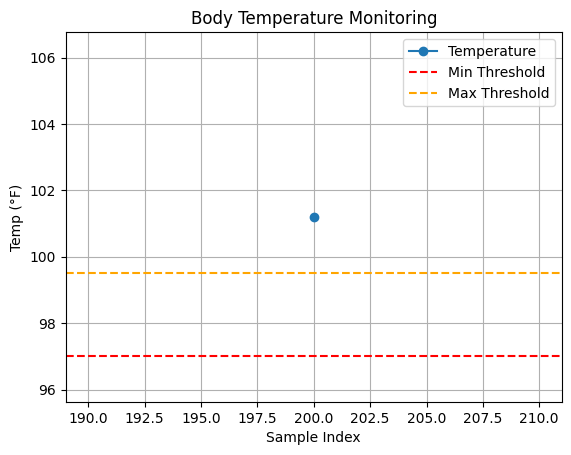

In [17]:
MIN_TEMP = 97.0
MAX_TEMP = 99.5

df.at[len(df)-1, 'Body_Temperature (°F)'] = 101.2  # simulate

def monitor_temperature(df):
    alerts = []
    for i, val in enumerate(df['Body_Temperature (°F)']):
        if val < MIN_TEMP:
            msg = f"⚠️  Row {i}: LOW Temperature = {val}°F"
            print(msg)
            alerts.append(msg)
        elif val > MAX_TEMP:
            msg = f"⚠️  Row {i}: HIGH Temperature = {val}°F"
            print(msg)
            alerts.append(msg)
    return alerts

alerts = monitor_temperature(df)

with open("alert_temperature.txt", "w") as f:
    for alert in alerts:
        f.write(alert + "\n")

plt.plot(df['Body_Temperature (°F)'], label='Temperature', marker='o')
plt.axhline(MIN_TEMP, color='red', linestyle='--', label='Min Threshold')
plt.axhline(MAX_TEMP, color='orange', linestyle='--', label='Max Threshold')
plt.title("Body Temperature Monitoring")
plt.xlabel("Sample Index")
plt.ylabel("Temp (°F)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
print("Min heart rate:", df['Heart_Rate (bpm)'].min())
print("Max heart rate:", df['Heart_Rate (bpm)'].max())


Min heart rate: 60.0
Max heart rate: 99.0


⚠️  Row 200: LOW SpO2 = 90.0%


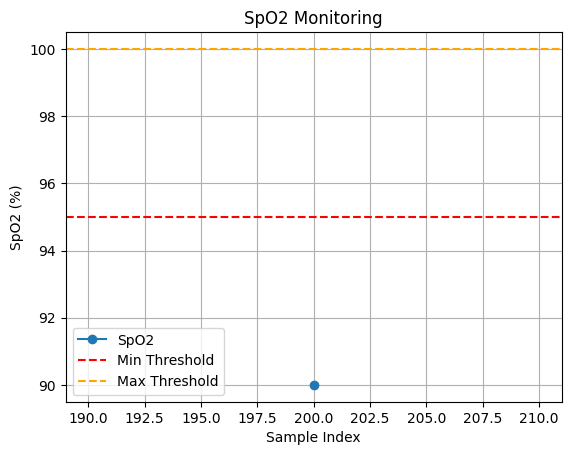

In [18]:
MIN_SPO2 = 95
MAX_SPO2 = 100

df.at[len(df)-1, 'Spo2 (%)'] = 90  # simulate

def monitor_spo2(df):
    alerts = []
    for i, val in enumerate(df['Spo2 (%)']):
        if val < MIN_SPO2:
            msg = f"⚠️  Row {i}: LOW SpO2 = {val}%"
            print(msg)
            alerts.append(msg)
        elif val > MAX_SPO2:
            msg = f"⚠️  Row {i}: HIGH SpO2 = {val}%"
            print(msg)
            alerts.append(msg)
    return alerts

alerts = monitor_spo2(df)

with open("alert_spo2.txt", "w") as f:
    for alert in alerts:
        f.write(alert + "\n")

plt.plot(df['Spo2 (%)'], label='SpO2', marker='o')
plt.axhline(MIN_SPO2, color='red', linestyle='--', label='Min Threshold')
plt.axhline(MAX_SPO2, color='orange', linestyle='--', label='Max Threshold')
plt.title("SpO2 Monitoring")
plt.xlabel("Sample Index")
plt.ylabel("SpO2 (%)")
plt.legend()
plt.grid(True)
plt.show()


⚠️  Row 200: HIGH Respiratory Rate = 25.0


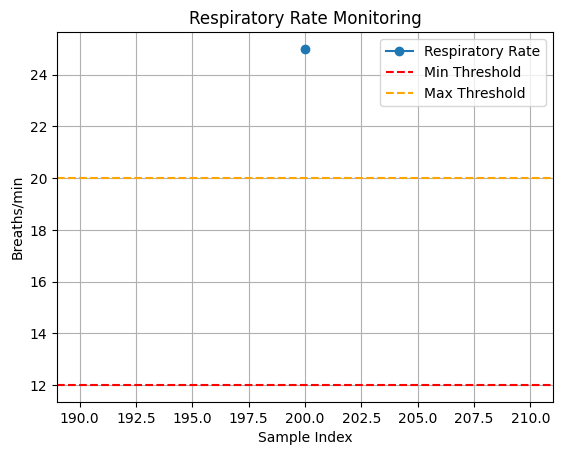

In [19]:
MIN_RR = 12
MAX_RR = 20

df.at[len(df)-1, 'Respiratory_Rate (breaths/min)'] = 25  # simulate

def monitor_resp_rate(df):
    alerts = []
    for i, val in enumerate(df['Respiratory_Rate (breaths/min)']):
        if val < MIN_RR:
            msg = f"⚠️  Row {i}: LOW Respiratory Rate = {val}"
            print(msg)
            alerts.append(msg)
        elif val > MAX_RR:
            msg = f"⚠️  Row {i}: HIGH Respiratory Rate = {val}"
            print(msg)
            alerts.append(msg)
    return alerts

alerts = monitor_resp_rate(df)

with open("alert_resp_rate.txt", "w") as f:
    for alert in alerts:
        f.write(alert + "\n")

plt.plot(df['Respiratory_Rate (breaths/min)'], label='Respiratory Rate', marker='o')
plt.axhline(MIN_RR, color='red', linestyle='--', label='Min Threshold')
plt.axhline(MAX_RR, color='orange', linestyle='--', label='Max Threshold')
plt.title("Respiratory Rate Monitoring")
plt.xlabel("Sample Index")
plt.ylabel("Breaths/min")
plt.legend()
plt.grid(True)
plt.show()


⚠️  Row 200: HIGH Systolic BP = 135.0 mmHg


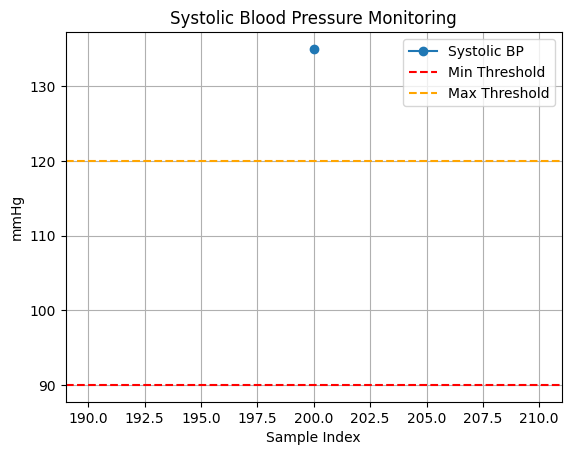

In [20]:
MIN_SYS = 90
MAX_SYS = 120

df.at[len(df)-1, 'Blood_Pressure_Systolic (mmHg)'] = 135  # simulate

def monitor_bp_systolic(df):
    alerts = []
    for i, val in enumerate(df['Blood_Pressure_Systolic (mmHg)']):
        if val < MIN_SYS:
            msg = f"⚠️  Row {i}: LOW Systolic BP = {val} mmHg"
            print(msg)
            alerts.append(msg)
        elif val > MAX_SYS:
            msg = f"⚠️  Row {i}: HIGH Systolic BP = {val} mmHg"
            print(msg)
            alerts.append(msg)
    return alerts

alerts = monitor_bp_systolic(df)

with open("alert_bp_systolic.txt", "w") as f:
    for alert in alerts:
        f.write(alert + "\n")

plt.plot(df['Blood_Pressure_Systolic (mmHg)'], label='Systolic BP', marker='o')
plt.axhline(MIN_SYS, color='red', linestyle='--', label='Min Threshold')
plt.axhline(MAX_SYS, color='orange', linestyle='--', label='Max Threshold')
plt.title("Systolic Blood Pressure Monitoring")
plt.xlabel("Sample Index")
plt.ylabel("mmHg")
plt.legend()
plt.grid(True)
plt.show()


⚠️  Row 200: LOW Diastolic BP = 50.0 mmHg


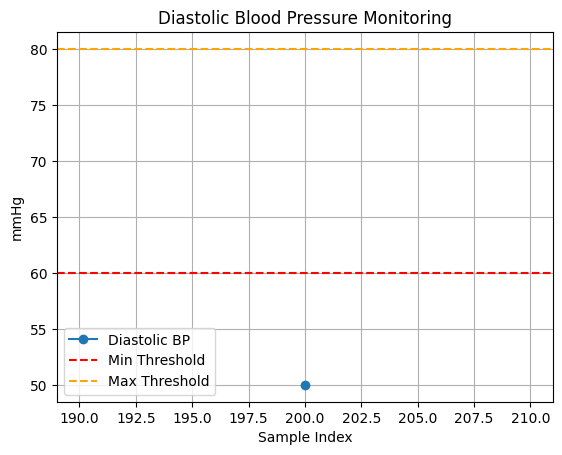

In [21]:
MIN_DIA = 60
MAX_DIA = 80

df.at[len(df)-1, 'Blood_Pressure_Diastolic (mmHg)'] = 50  # simulate

def monitor_bp_diastolic(df):
    alerts = []
    for i, val in enumerate(df['Blood_Pressure_Diastolic (mmHg)']):
        if val < MIN_DIA:
            msg = f"⚠️  Row {i}: LOW Diastolic BP = {val} mmHg"
            print(msg)
            alerts.append(msg)
        elif val > MAX_DIA:
            msg = f"⚠️  Row {i}: HIGH Diastolic BP = {val} mmHg"
            print(msg)
            alerts.append(msg)
    return alerts

alerts = monitor_bp_diastolic(df)

with open("alert_bp_diastolic.txt", "w") as f:
    for alert in alerts:
        f.write(alert + "\n")

plt.plot(df['Blood_Pressure_Diastolic (mmHg)'], label='Diastolic BP', marker='o')
plt.axhline(MIN_DIA, color='red', linestyle='--', label='Min Threshold')
plt.axhline(MAX_DIA, color='orange', linestyle='--', label='Max Threshold')
plt.title("Diastolic Blood Pressure Monitoring")
plt.xlabel("Sample Index")
plt.ylabel("mmHg")
plt.legend()
plt.grid(True)
plt.show()
